**Intro**

---

Project: Predicting Heart Disease / Team 3



In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import *
import matplotlib.pyplot as plt
import statsmodels.api as sm
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data = pd.read_csv('/content/drive/Shared drives/BA476 Team Project/heart.csv')

data.head()
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# 1-Pre-Processing:

In [3]:
#replace all 0's in resting BP with the mean
data["RestingBP"] = data['RestingBP'].replace(0,data[data["RestingBP"]>0]["RestingBP"].mean())
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144.0,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130.0,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130.0,236,0,LVH,174,N,0.0,Flat,1


##Imputation methods:

In [4]:
#creating a new dataframe with only cholestrol and heart disease columns

data_imp = data[["Cholesterol", "HeartDisease", "Age"]]
print("Cholesterols which are 0: ", data_imp[data_imp["Cholesterol"] == 0].shape)
print("Total instances: ", data_imp.shape)
data_imp

Cholesterols which are 0:  (172, 3)
Total instances:  (918, 3)


,Cholesterol,HeartDisease,Age
0,289,0,40
1,180,1,49
2,283,0,37
3,214,1,48
4,195,0,54
...,...,...,...
913,264,1,45
914,193,1,68
915,131,1,57
916,236,1,57


In [5]:
print("Median: ", data_imp[data_imp["Cholesterol"]>0]["Cholesterol"].median())
print("Mean: ",data_imp[data_imp["Cholesterol"]>0]["Cholesterol"].mean())
print("Mode: ", data_imp[data_imp["Cholesterol"]>0]["Cholesterol"].mode().iloc[0])

Median:  237.0
Mean:  244.6353887399464
Mode:  254


In [6]:
data_test = data_imp
data_test.loc[data_test["Cholesterol"] == 0, "Cholesterol"] = np.nan;
data_train = data_imp[data_imp["Cholesterol"] > 0]
data_imp.groupby("HeartDisease").agg({"Age":"count",
                                       "Cholesterol":"mean"})

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Age,Cholesterol
HeartDisease,,
0,410,238.769231
1,508,251.061798


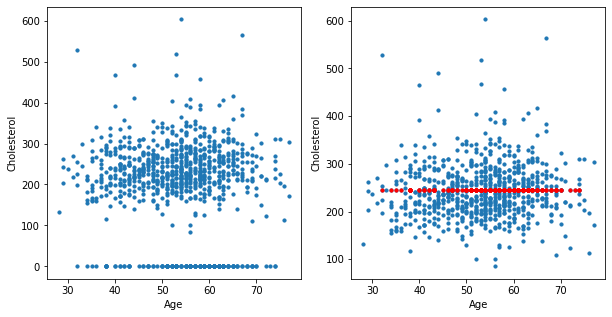

,Age,Cholesterol
HeartDisease,,
0.0,410,239.055385
1.0,508,249.138935


In [7]:
#Mean Imputer
from sklearn.impute import SimpleImputer

copy_train = data_train
copy_test = data_test
imp = SimpleImputer(missing_values = np.nan, strategy = "mean")
imp.fit(copy_train)
imp.transform(copy_train)
test_mean = pd.DataFrame(imp.transform(copy_test), columns = copy_test.columns)

fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].scatter(data.Age, data.Cholesterol, s = 10)
ax[1].scatter(test_mean.Age, test_mean.Cholesterol, s = 10)
ax[1].scatter(test_mean[test_mean["Cholesterol"] == data_imp[data_imp["Cholesterol"]>0]["Cholesterol"].mean()]["Age"],test_mean[test_mean["Cholesterol"] == data_imp[data_imp["Cholesterol"]>0]["Cholesterol"].mean()]["Cholesterol"], c = "r", s = 10)
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Cholesterol")
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Cholesterol")
plt.show()
test_mean.groupby("HeartDisease").agg({"Age":"count",
                                       "Cholesterol":"mean"})

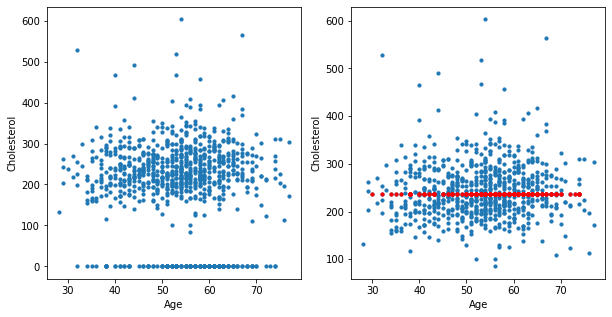

,Age,Cholesterol
HeartDisease,,
0.0,410,238.682927
1.0,508,246.854331


In [8]:
#Median Imputer
copy_train = data_train
copy_test = data_test
imp = SimpleImputer(missing_values = np.nan, strategy = "median")
imp.fit(copy_train)
imp.transform(copy_train)
test_median = pd.DataFrame(imp.transform(copy_test), columns = data_test.columns)

fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].scatter(data.Age, data.Cholesterol, s = 10)
ax[1].scatter(test_median.Age, test_median.Cholesterol, s = 10)
ax[1].scatter(test_median[test_median["Cholesterol"] == data_imp[data_imp["Cholesterol"]>0]["Cholesterol"].median()]["Age"],test_median[test_median["Cholesterol"] == data_imp[data_imp["Cholesterol"]>0]["Cholesterol"].median()]["Cholesterol"], c = "r", s = 10)
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Cholesterol")
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Cholesterol")
plt.show()
test_median.groupby("HeartDisease").agg({"Age":"count",
                                       "Cholesterol":"mean"})

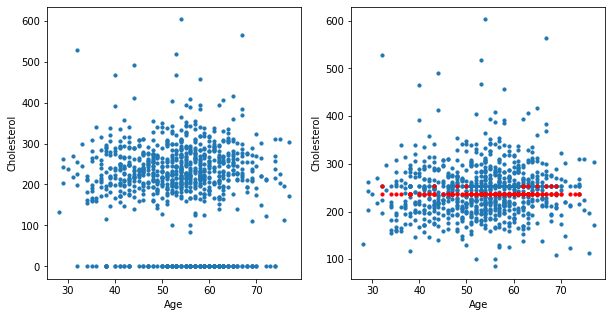

,Age,Cholesterol
HeartDisease,,
0.0,410,239.512195
1.0,508,251.940945


In [9]:
#Most Frequent imputer
copy_train = data_train
copy_test = data_test
imp = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")
imp.fit(copy_train)
imp.transform(copy_train)
test_mode = pd.DataFrame(imp.transform(copy_test),columns = data_train.columns)

fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].scatter(data.Age, data.Cholesterol, s = 10)
ax[1].scatter(test_mode.Age, test_mode.Cholesterol, s = 10)
ax[1].scatter(test_mode[test_mode["Cholesterol"] == data_imp[data_imp["Cholesterol"]>0]["Cholesterol"].mode().iloc[0]]["Age"],test_median[test_mode["Cholesterol"] == data_imp[data_imp["Cholesterol"]>0]["Cholesterol"].mode().iloc[0]]["Cholesterol"], c = "r", s = 10)

ax[0].set_xlabel("Age")
ax[0].set_ylabel("Cholesterol")
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Cholesterol")
plt.show()
test_mode.groupby("HeartDisease").agg({"Age":"count",
                                       "Cholesterol":"mean"})

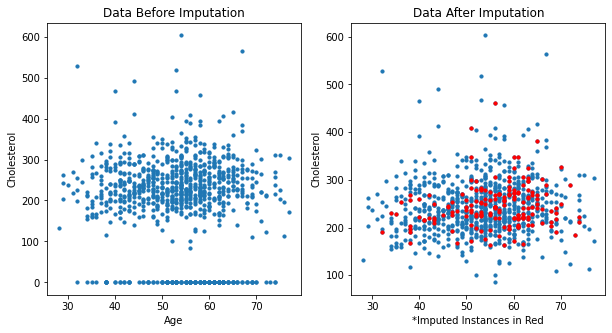

In [10]:
#KNN Imputer
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans

#Create dummies, drop first
copy = pd.get_dummies(data)
copy["Impute"] = 0
copy.loc[copy["Cholesterol"] == 0, "Impute"] = 1
copy.loc[copy["Cholesterol"] == 0, "Cholesterol"] = np.nan
imp = KNNImputer(missing_values = np.nan, n_neighbors = 2, weights = "uniform")
knn_imp = pd.DataFrame(imp.fit_transform(copy), columns = copy.columns)

fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].scatter(data.Age, data.Cholesterol, s = 10)
ax[1].scatter(knn_imp.Age, knn_imp.Cholesterol, s = 10)
ax[1].scatter(knn_imp[knn_imp["Impute"] == 1].Age, knn_imp[knn_imp["Impute"] == 1].Cholesterol, s = 10, c = "r")
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Cholesterol")
ax[1].set_ylabel("Cholesterol")
ax[1].set_xlabel("*Imputed Instances in Red")
ax[0].set_title("Data Before Imputation")
ax[1].set_title("Data After Imputation")
plt.show()
knn_imp = knn_imp.drop(["Impute"], axis=1)

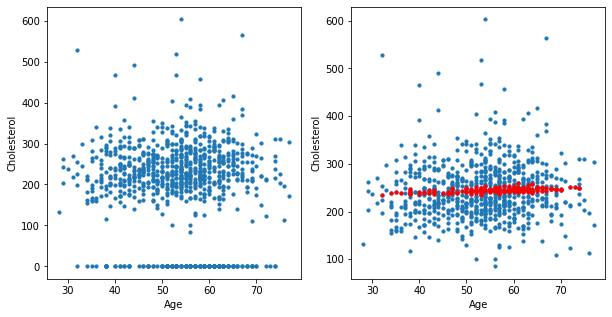

In [11]:
#MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Create dummies, drop first
copy = pd.get_dummies(data)
copy["Impute"] = 0
copy.loc[copy["Cholesterol"] == 0, "Impute"] = 1
copy.loc[copy["Cholesterol"] == 0, "Cholesterol"] = np.nan
imp = IterativeImputer(missing_values=np.nan, max_iter = 100, random_state = 0)
imp.fit(copy.sample(frac=.6))
mice_imp = pd.DataFrame(imp.transform(copy), columns = copy.columns)

fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].scatter(data.Age, data.Cholesterol, s = 10)
ax[1].scatter(mice_imp.Age, mice_imp.Cholesterol, s = 10)
ax[1].scatter(mice_imp[mice_imp["Impute"] == 1].Age, mice_imp[mice_imp["Impute"] == 1].Cholesterol, s = 10, c = "r")
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Cholesterol")
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Cholesterol")
plt.show()
mice_imp = mice_imp.drop(["Impute"], axis=1)

In [12]:
#Copy of df with each imputation method on Cholesterol
#test_mean
#test_median
#test_mode
#knn_imp
#mice_imp

In [13]:
#GetDummies
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'Oldpeak']
data_with_dummies = pd.get_dummies(data= data, columns= categorical_features,drop_first=True) #drop_first=False keeps all the categories, drop_first=True removes a reference category
data_with_dummies.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160.0,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130.0,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138.0,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150.0,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


Imputing on Cholesterol using kNN, real dataframe

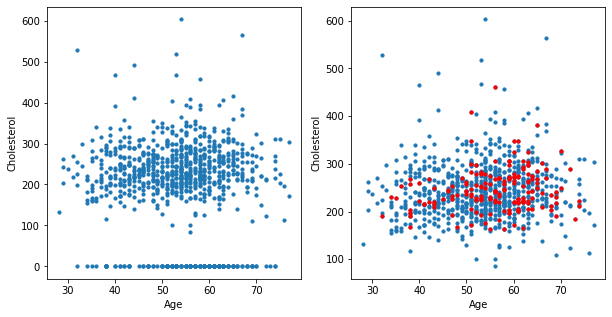

In [14]:
#Imputing on Cholesterol using kNN
data_with_dummies["Impute"] = 0
data_with_dummies.loc[data_with_dummies["Cholesterol"] == 0, "Impute"] = 1
data_with_dummies.loc[data_with_dummies["Cholesterol"] == 0, "Cholesterol"] = np.nan
imp = KNNImputer(missing_values = np.nan, n_neighbors = 2, weights = "uniform")
data_with_dummies = pd.DataFrame(imp.fit_transform(data_with_dummies), columns = data_with_dummies.columns)

fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].scatter(data.Age, data.Cholesterol, s = 10)
ax[1].scatter(data_with_dummies.Age, data_with_dummies.Cholesterol, s = 10)
ax[1].scatter(data_with_dummies[data_with_dummies["Impute"] == 1].Age, data_with_dummies[data_with_dummies["Impute"] == 1].Cholesterol, s = 10, c = "r")
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Cholesterol")
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Cholesterol")
plt.show()

In [15]:
print(data_with_dummies.columns)
print("Check if any cholesterol columns are set at 0: ", data_with_dummies[data_with_dummies["Cholesterol"]==0].shape)

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up', 'Impute'],
      dtype='object')
Check if any cholesterol columns are set at 0:  (0, 17)


Checking for Outliers using IQR **(Performance is worse with IQR)**

In [16]:
iqr = data_with_dummies.Cholesterol.quantile(.75)-data_with_dummies.Cholesterol.quantile(.25)
print("75th percentile: ", data_with_dummies.Cholesterol.quantile(.75), "25th percentile",data_with_dummies.Cholesterol.quantile(.25))
low = data_with_dummies.Cholesterol.quantile(.25) - (1.5 * iqr)
high = data_with_dummies.Cholesterol.quantile(.75) + (1.5*iqr)
print("Lower bound: ", low, "Upper bound: ", high)
print("Instances before dropping outliers:", len(data_with_dummies))
iqr_copy = data_with_dummies[(data_with_dummies["Cholesterol"] < high) & (data_with_dummies["Cholesterol"] > low)]
print("Instances after dropping outliers:",len(iqr_copy))

75th percentile:  274.0 25th percentile 209.125
Lower bound:  111.8125 Upper bound:  371.3125
Instances before dropping outliers: 918
Instances after dropping outliers: 891


# 2-Feature Engineering

In [17]:
data_with_dummies['age*maxHR'] = data_with_dummies['Age']*data_with_dummies['MaxHR']

In [18]:
x = data_with_dummies[["Age","MaxHR"]]
y = data_with_dummies["HeartDisease"]
x2 = sm.add_constant(x)

model = sm.OLS(y,x2)
result = model.fit()
print(result.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:           HeartDisease   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     100.3
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           4.06e-40
Time:                        22:32:24   Log-Likelihood:                -570.02
No. Observations:                 918   AIC:                             1146.
Df Residuals:                     915   BIC:                             1160.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0429      0.149      7.011      0.0

In [19]:
x = data_with_dummies[["Age","MaxHR",'age*maxHR']]
y = data_with_dummies["HeartDisease"]
x2 = sm.add_constant(x)

model = sm.OLS(y,x2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           HeartDisease   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     67.22
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           2.78e-39
Time:                        22:32:25   Log-Likelihood:                -569.50
No. Observations:                 918   AIC:                             1147.
Df Residuals:                     914   BIC:                             1166.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5239      0.499      3.053      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


From this analysis this interaction term is not a good addition.

Test for Interaction term Age  *  Resting:

In [20]:
x = data_with_dummies[["Age","RestingBP"]]
y = data_with_dummies["HeartDisease"]
x2 = sm.add_constant(x)

model = sm.OLS(y,x2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           HeartDisease   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     40.65
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           1.22e-17
Time:                        22:32:25   Log-Likelihood:                -621.94
No. Observations:                 918   AIC:                             1250.
Df Residuals:                     915   BIC:                             1264.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3798      0.132     -2.875      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [21]:
data_with_dummies['age*restingbp'] = data_with_dummies['Age']*data_with_dummies['RestingBP']

In [22]:
x = data_with_dummies[["Age","RestingBP",'age*restingbp']]
y = data_with_dummies["HeartDisease"]
x2 = sm.add_constant(x)

model = sm.OLS(y,x2)
result = model.fit()
print(result.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:           HeartDisease   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     27.92
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           2.80e-17
Time:                        22:32:25   Log-Likelihood:                -620.77
No. Observations:                 918   AIC:                             1250.
Df Residuals:                     914   BIC:                             1269.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6524      0.687      0.950

Test Interation Term Gender and MaxHR:

In [23]:
x = data_with_dummies[['MaxHR','Sex_M']]
y = data_with_dummies["HeartDisease"]
x2 = sm.add_constant(x)

model = sm.OLS(y,x2)
result = model.fit()
print(result.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:           HeartDisease   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     125.3
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           7.75e-49
Time:                        22:32:25   Log-Likelihood:                -549.87
No. Observations:                 918   AIC:                             1106.
Df Residuals:                     915   BIC:                             1120.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2736      0.091     14.013      0.0

In [24]:
data_with_dummies['maxhr*gender'] = data_with_dummies['MaxHR']*data_with_dummies['Sex_M']

In [25]:
x = data_with_dummies[['MaxHR','Sex_M','maxhr*gender']]
y = data_with_dummies["HeartDisease"]
x2 = sm.add_constant(x)

model = sm.OLS(y,x2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           HeartDisease   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     85.05
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           1.55e-48
Time:                        22:32:25   Log-Likelihood:                -548.01
No. Observations:                 918   AIC:                             1104.
Df Residuals:                     914   BIC:                             1123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.9042      0.212      4.263   

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Testing Interaction Term OldPeak and ST_Slope_Up


In [26]:
x = data_with_dummies[['Oldpeak','ST_Slope_Up']]
y = data_with_dummies["HeartDisease"]
x2 = sm.add_constant(x)

model = sm.OLS(y,x2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           HeartDisease   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     313.0
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          2.63e-104
Time:                        22:32:25   Log-Likelihood:                -421.73
No. Observations:                 918   AIC:                             849.5
Df Residuals:                     915   BIC:                             863.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7278      0.024     30.143      

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [27]:
data_with_dummies['oldpeak*st_slope_up'] = data_with_dummies['Oldpeak']*data_with_dummies['ST_Slope_Up']

In [28]:
x = data_with_dummies[['Oldpeak','ST_Slope_Up','oldpeak*st_slope_up']]
y = data_with_dummies["HeartDisease"]
x2 = sm.add_constant(x)

model = sm.OLS(y,x2)
result = model.fit()
print(result.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:           HeartDisease   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     235.0
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          5.48e-113
Time:                        22:32:25   Log-Likelihood:                -398.61
No. Observations:                 918   AIC:                             805.2
Df Residuals:                     914   BIC:                             824.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.7897    

Only oldpeak*st_slope_up is significant at the 1% level, so it will be the only one added to our dataset

In [29]:
data_with_dummies.drop(columns=['age*maxHR','age*restingbp','maxhr*gender','Impute'], inplace=True)

In [30]:
data_with_dummies.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,oldpeak*st_slope_up
0,40.0,140.0,289.0,0.0,172.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,49.0,160.0,180.0,0.0,156.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,37.0,130.0,283.0,0.0,98.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,48.0,138.0,214.0,0.0,108.0,1.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,54.0,150.0,195.0,0.0,122.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# 3-Exploratory Analysis

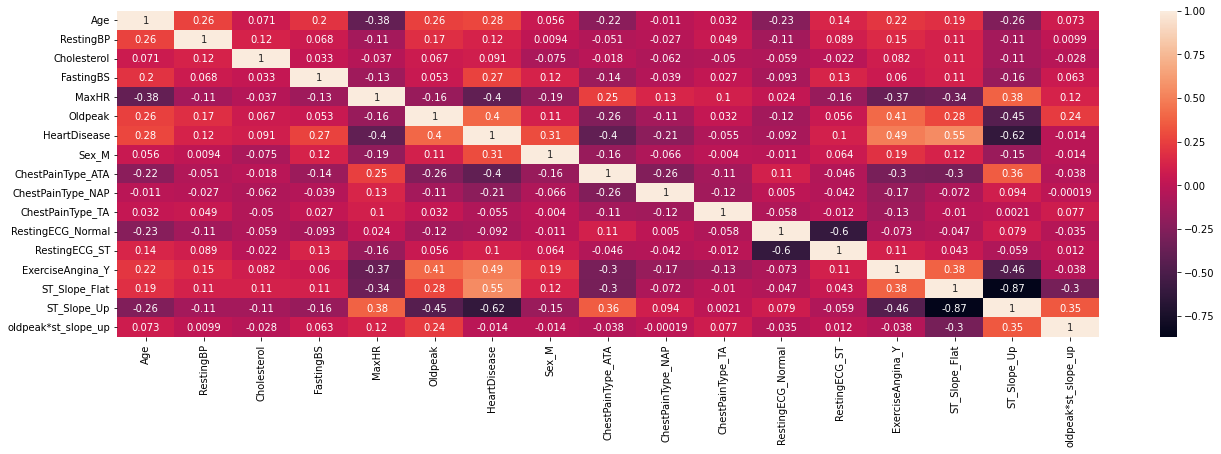

In [31]:
fig = plt.figure(figsize=(22,6))
corrMatrix = data_with_dummies.corr() 
sns.heatmap(corrMatrix, annot=True)
plt.show()

Text(0, 0.5, 'Count of HeartDisease')

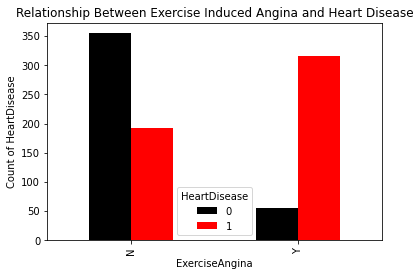

In [32]:
data.groupby(['ExerciseAngina','HeartDisease'])['HeartDisease'].count().unstack().plot.bar(color=['black', 'red'])
plt.title('Relationship Between Exercise Induced Angina and Heart Disease')
plt.ylabel('Count of HeartDisease')

Text(0, 0.5, 'Count of HeartDisease')

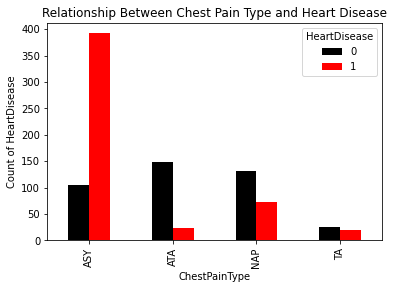

In [33]:
data.groupby(['ChestPainType','HeartDisease'])['HeartDisease'].count().unstack().plot.bar(color=['black', 'red'])
plt.title('Relationship Between Chest Pain Type and Heart Disease')
plt.ylabel('Count of HeartDisease')

Text(0, 0.5, 'Count of HeartDisease')

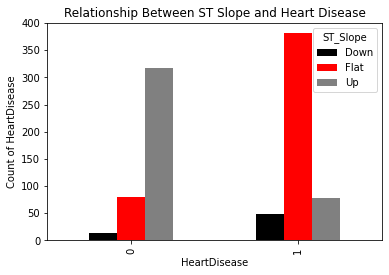

In [34]:
data.groupby(['HeartDisease','ST_Slope'])['HeartDisease'].count().unstack().plot.bar(color=['black', 'red','gray'])
plt.title('Relationship Between ST Slope and Heart Disease')
plt.ylabel('Count of HeartDisease')

#4-Baseline Model

In [35]:
baselinedf = data_with_dummies.groupby('HeartDisease').agg('count')

baseline_accurary = max((baselinedf['Age'][0]),(baselinedf['Age'][1])) / 918

print(baseline_accurary)

0.5533769063180828


#5-Data Test Split

In [36]:
y = data_with_dummies['HeartDisease']
X = data_with_dummies.drop('HeartDisease', axis=1)

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =1)

In [38]:
data_with_dummies.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up',
       'oldpeak*st_slope_up'],
      dtype='object')

#6-Models

## Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

model = LogisticRegression(max_iter=10000).fit(X_train, y_train)
log_cv_scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'f1')
log_cv_f1 = np.mean(log_cv_scores).round(4)

log_predictions = model.predict(X_test)
log_f1_test_accuracy = f1_score(y_test, log_predictions).round(4)

print('Train F1 Score(Threshold=0.5): ' + str(log_cv_f1)) #t=0.5 is the default for logistic regression
print('Test F1 Score(Threshold=0.5): ' + str(log_f1_test_accuracy))

print(log_predictions)

Train F1 Score(Threshold=0.5): 0.8629
Test F1 Score(Threshold=0.5): 0.9041
[1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1.]


In [40]:
from sklearn import neighbors
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

pipe2 = Pipeline([('scaler',StandardScaler()), ('log',LogisticRegression(max_iter = 1000))])
parameters = {'log__penalty':[ 'l2', 'none'], 
              'log__C':[.00001, .0008, .0009,.001, .0015, .0002]
              }

log_tuned = GridSearchCV(pipe2, param_grid=parameters,
                        scoring='f1', cv=5, n_jobs=-1
                        )

log_tuned.fit(X_train, y_train.values.ravel())
log_results = log_tuned.best_params_

log_results


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


{'log__C': 1e-05, 'log__penalty': 'none'}

Logistic Regression Tuning - Changing Thresholds

In [41]:
from sklearn.preprocessing import binarize

model2 = LogisticRegression(max_iter=10000, C= log_results['log__C'], penalty = log_results['log__penalty'])

model2.fit(X_train, y_train)

probs_data_with_dummies = pd.DataFrame(model2.predict_proba(X_train))

probs_data_with_dummies.head()

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


,0,1
0,0.069927,0.930073
1,0.987682,0.012318
2,0.331837,0.668163
3,0.031106,0.968894
4,0.724908,0.275092


t=0.010: Acc=0.584, Rec=1.000, Pre=0.566, F1=0.723 
t=0.050: Acc=0.711, Rec=0.992, Pre=0.654, F1=0.788 
t=0.100: Acc=0.774, Rec=0.982, Pre=0.711, F1=0.825 
t=0.150: Acc=0.801, Rec=0.975, Pre=0.740, F1=0.842 
t=0.200: Acc=0.816, Rec=0.965, Pre=0.760, F1=0.850 
t=0.250: Acc=0.830, Rec=0.950, Pre=0.783, F1=0.858 
t=0.300: Acc=0.849, Rec=0.945, Pre=0.809, F1=0.871 
t=0.400: Acc=0.858, Rec=0.920, Pre=0.836, F1=0.876 
t=0.500: Acc=0.856, Rec=0.887, Pre=0.853, F1=0.869 
t=0.600: Acc=0.853, Rec=0.847, Pre=0.878, F1=0.862 
t=0.700: Acc=0.846, Rec=0.802, Pre=0.904, F1=0.850 
t=0.800: Acc=0.804, Rec=0.691, Pre=0.929, F1=0.793 
t=0.900: Acc=0.719, Rec=0.513, Pre=0.944, F1=0.664 


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


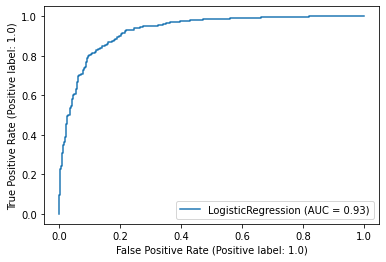

In [42]:
from sklearn.metrics import f1_score, recall_score, precision_score

thresholds = [0.01,0.05,.1,.15,.2,0.25,.3,.4,.5,.6,.7,.8,.9]
f1_model_scores = []

for t in thresholds:
  yhat = np.where( probs_data_with_dummies[1]>t, 1, 0)
  f1_model_scores += [[f1_score(y_train,yhat),t]]
  print('t={:.3f}: Acc={:.3f}, Rec={:.3f}, Pre={:.3f}, F1={:.3f} '.format(t, accuracy_score(y_train, yhat), recall_score(y_train, yhat), precision_score(y_train, yhat), f1_score(y_train, yhat) ));

plot_roc_curve(model2, X_train, y_train)

In [43]:
best_threshold = max(f1_model_scores)[1]

Running a model with the tunned threshold parameter:

In [44]:
from sklearn.metrics import f1_score, recall_score, precision_score

log_tuned = LogisticRegression(max_iter = 10000,C= log_results['log__C'], penalty = log_results['log__penalty'])
log_tuned.fit(X_train, y_train)
probs_data_with_dummies_tuned = pd.DataFrame(log_tuned.predict_proba(X_test))


yhat_test = np.where( probs_data_with_dummies_tuned[1]>best_threshold, 1, 0)

print('t={:.3f}: Acc={:.3f}, Rec={:.3f}, Pre={:.3f}, F1={:.3f} '.format(t, accuracy_score(y_test, yhat_test), recall_score(y_test, yhat_test), precision_score(y_test, yhat_test), f1_score(y_test, yhat_test) ));

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


t=0.900: Acc=0.891, Rec=0.927, Pre=0.895, F1=0.911 


##Ridge Classifier Regression

In [45]:
#Add a pipeline so we can standardize right before ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeClassifier

ridge_model = RidgeClassifier().fit(X_train, y_train)
ridge_cv_scores = cross_val_score(ridge_model, X_train, y_train, cv = 10, scoring = 'f1')
ridge_cv_f1 = np.mean(ridge_cv_scores).round(4)

print('Train F1 Score(Validation Set): ' + str(ridge_cv_f1))

Train F1 Score(Validation Set): 0.8639


##Decision Tree:

In [46]:
#Decision Tree(initial model)
from sklearn.model_selection import cross_val_score

dt = DecisionTreeClassifier(random_state=0, ccp_alpha=0)

dt_cv_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='f1')
dt_cv_f1 = np.mean(dt_cv_scores).round(4)

print('Train F1 Score(Validation Set): ' + str(dt_cv_f1))

Train F1 Score(Validation Set): 0.788


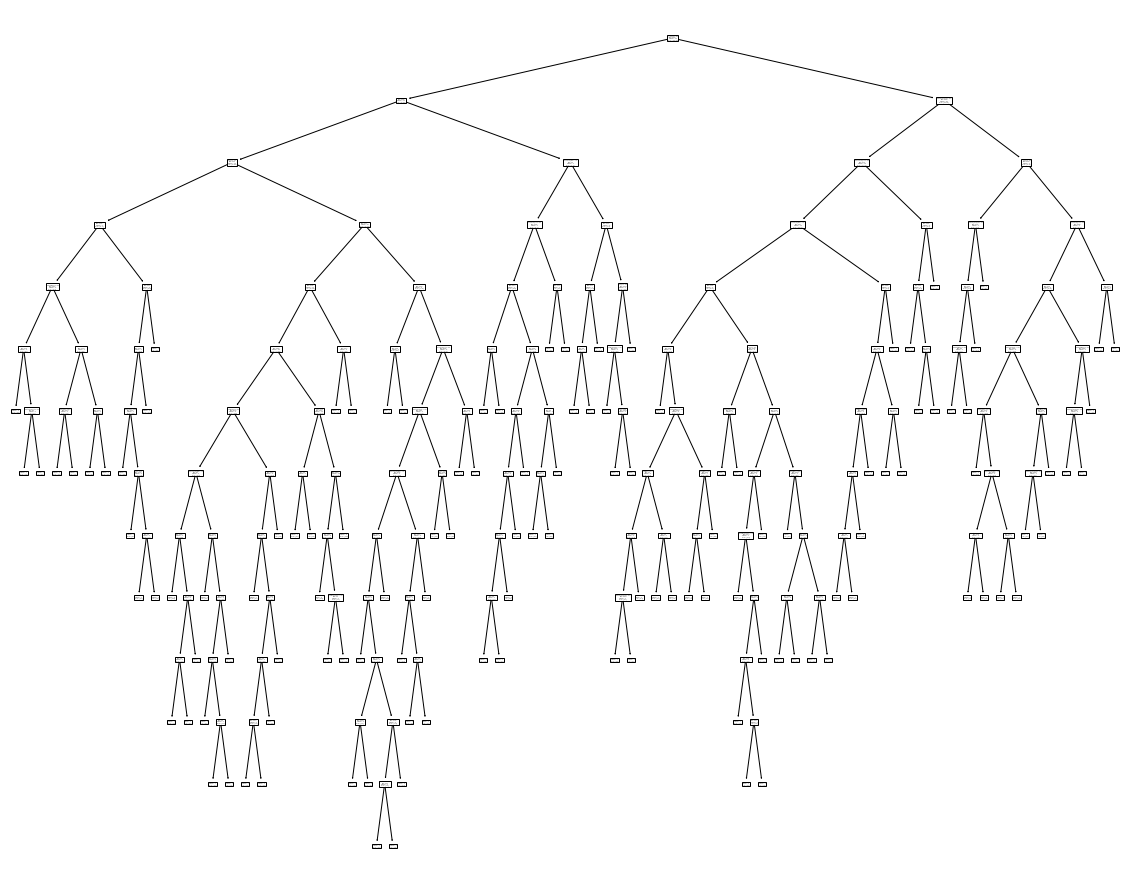

In [47]:
#Plotting Tree
from sklearn import tree
fig = plt.figure(figsize=(20,16))
tree.plot_tree(dt.fit(X_train, y_train), feature_names=X.columns); 

Tuning the Decision Tree:

In [48]:
#Decisios Tree: Tunning Parameters(alpha):

alphas = [1, 0.05, 0.04, 0.03, 0.02, 0.01, 0.009, 0.008, 0.007, 0.006, 0.005, 0]
f1_scores = []

for value in alphas:
  dt = DecisionTreeClassifier(ccp_alpha=value, random_state=0)

  current_f1_score = np.mean(cross_val_score(dt, X_train, y_train, cv=5, scoring='f1'))
  f1_scores.append([current_f1_score,value])


 # tree.plot_tree(dt.fit(X_train, y_train), feature_names=X.columns)

f1_scores
best_score = max(f1_scores)[0]
best_alpha = max(f1_scores)[1]
print('Best alpha = ' + str(best_alpha) + '\nBest f1: ' + str(best_score)) 


Best alpha = 0.007
Best f1: 0.8390014760512583


Decision Tree - Tuned:

In [49]:
dt_tuned = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=0)
dt_tuned.fit(X_train, y_train)
yhat_train = dt_tuned.predict(X_train)
yhat_test = dt_tuned.predict(X_test)
#Did not use cv to estimate test set performance because that would mean using some of the data we saw by tunning the parameter alpha in the cv
dt_validation_tuned_scores_f1 = f1_score(y_train, yhat_train) #So we can compare to the untuned Tree

dt_tuned_scores_f1 = f1_score(y_test, yhat_test)
dt_tuned_scores_acc = accuracy_score(y_test, yhat_test)
dt_tuned_scores_recall = recall_score(y_test, yhat_test)

dt_validation_f1 = np.mean(dt_validation_tuned_scores_f1).round(4)
dt_tunned_f1 = np.mean(dt_tuned_scores_f1).round(4)
dt_tunned_acc = np.mean(dt_tuned_scores_acc).round(4)
dt_tunned_recall = np.mean(dt_tuned_scores_recall).round(4)

print('Validation Set F1 before tunning: ' + str(dt_cv_f1) + ' Validation Set F1 after tunning: ' + str(dt_validation_f1) +
      '\n\nTunned Decision Tree Test Performance: \n' +
    'Tunned Tree F1: ' + str(dt_tunned_f1) + '\nTunned Accuracy: ' + 
      str(dt_tunned_acc) + '\nTunned Recall: ' +
      str(dt_tunned_recall) + '\nAlpha Parameter: ' +str(best_alpha))



Validation Set F1 before tunning: 0.788 Validation Set F1 after tunning: 0.8656

Tunned Decision Tree Test Performance: 
Tunned Tree F1: 0.8772
Tunned Accuracy: 0.8478
Tunned Recall: 0.9091
Alpha Parameter: 0.007


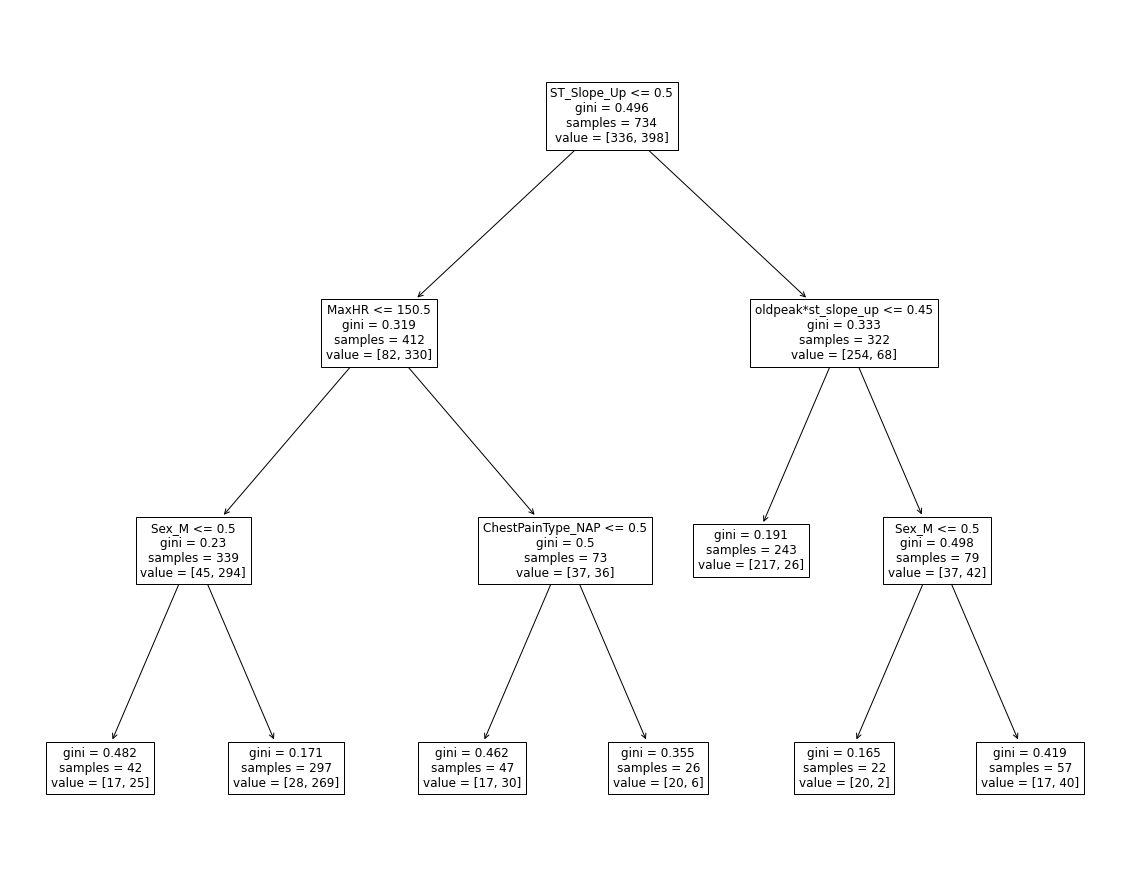

In [50]:
#Plotting Tree
from sklearn import tree
fig = plt.figure(figsize=(20,16))
tree.plot_tree(dt_tuned, feature_names=X.columns); 

## Random Forest:

F1: 0.8804347826086957
Recall: 0.8818181818181818
Accuracy: 0.8804347826086957


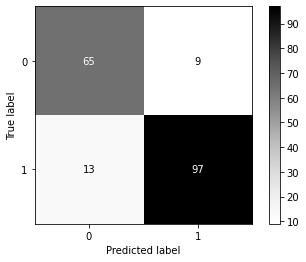

In [51]:
#Base Random Forest:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train.values.ravel())

yhat_rf = rf.predict(X_test)

print('F1: ' + str(accuracy_score(y_test, yhat_rf)) + '\nRecall: ' 
      + str(recall_score(y_test, yhat_rf)) + '\nAccuracy: '  + str(accuracy_score(y_test, yhat_rf)))

disp_test = ConfusionMatrixDisplay(confusion_matrix(y_test, yhat_rf))
disp_test.plot(cmap='Greys', colorbar='False');

Random Forest - Tuned:

In [52]:
from sklearn.model_selection import GridSearchCV

est = RandomForestClassifier(random_state=0)
parameters = {'n_estimators':[10,50,100,200], 
              'ccp_alpha':[0.005, 0.004, 0.003, 0.002, 0.001, 0.0001, 0.00001, 0]
              }

rf_tuned = GridSearchCV(estimator=est, param_grid=parameters,
                        scoring='f1', cv=5, n_jobs=-1
                        )

rf_tuned.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'ccp_alpha': [0.005, 0.004, 0.003, 0.002, 0.001,
                                       0.0001, 1e-05, 0],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='f1')

In [53]:
rf_tuned.best_params_

{'ccp_alpha': 0.001, 'n_estimators': 100}

In [54]:
rf_tuned.best_params_
yhat_rf_tuned = rf_tuned.best_estimator_.predict(X_test)
print('Tuned RF: ')
print('F1 : ' +str(f1_score(y_test,yhat_rf_tuned)))
print('Recall: ' + str(recall_score(y_test,yhat_rf_tuned).round(3)))
print('Accuracy: ' + str(accuracy_score(y_test,yhat_rf_tuned).round(3)))

Tuned RF: 
F1 : 0.8981481481481483
Recall: 0.882
Accuracy: 0.88


##Reborn Tree

In [55]:
#Change to just match predictions on the train set
yhat_rf_train = rf.predict(X_train) #Getting the rf's predictions for train data

tree_rf_sim = DecisionTreeClassifier(random_state=0)
tree_rf_sim.fit(X_train, yhat_rf_train) #Fitting the model so that the true labels are now the values predicted by the Random Forest
tree_rf_sim_predictions = tree_rf_sim.predict(X_train)

similarity = accuracy_score(y_train, tree_rf_sim_predictions) #Checking how close the new tree predictions are to the original RF predictions over test set
print('The new Tree Clsassifier makes the same predictions as the RF in ' + str(similarity*100) + '% of the train instances') #New tree is overfitting the train data

#Trying to tune the new tree:
#Decisios Tree: Tunning Parameters(alpha):
alphas = [0.01, 0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002, 0.001, 0.0005, 0]
accuracy_scores = []

for value in alphas:
  dt = DecisionTreeClassifier(ccp_alpha=value, random_state=0)

  current_accuracy_score = np.mean(cross_val_score(dt, X_train, yhat_rf_train, cv=10, scoring='accuracy'))
  accuracy_scores.append([current_accuracy_score,value])


 # tree.plot_tree(dt.fit(X_train, y_train), feature_names=X.columns)

best_alpha = max(accuracy_scores)[1]
print('Best alpha = ' + str(best_alpha))

#Re-cheking with the best alpha:
tree_rf_sim = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=0)
tree_rf_sim.fit(X_train, yhat_rf_train) 
tree_rf_sim_predictions = tree_rf_sim.predict(X_test)

similarity = accuracy_score(y_test, tree_rf_sim_predictions) 
print('The new Tree Clsassifier makes the same predictions as the RF in ' + str(similarity*100) + '% of the test instances') #Still not great :/

The new Tree Clsassifier makes the same predictions as the RF in 100.0% of the train instances
Best alpha = 0.005
The new Tree Clsassifier makes the same predictions as the RF in 85.32608695652173% of the test instances


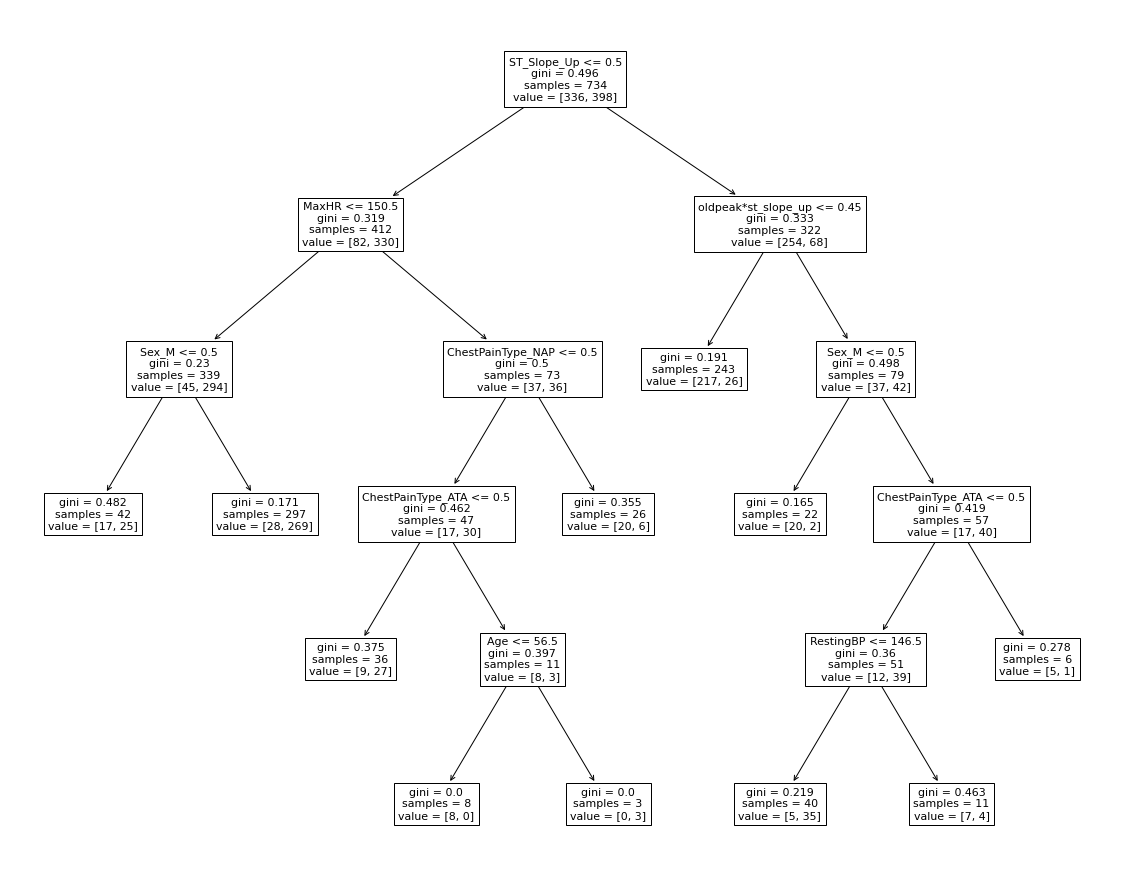

In [56]:
fig = plt.figure(figsize=(20,16))
tree.plot_tree(tree_rf_sim, feature_names=X.columns);

## Boosting (Decision Tree):

In [57]:
from sklearn.ensemble import AdaBoostClassifier

f1_scores = []

estimators = [10,50,100]
learning_rate = [0.001,0.1,0.5,0.75,1]
alphas = [0.0001,0.001,0.01,0.1,1]

for rate in learning_rate:

  for n in estimators:

    for a in alphas:

      bt = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=a), 
                              learning_rate=rate,
                              n_estimators=n,
                              random_state=0
                              )
      
      cv_scores = cross_val_score(bt, X_train, y_train.values.ravel(), cv=5, scoring='f1')
      current_f1 = np.mean(cv_scores)

      f1_scores.append([current_f1,rate,n,a])

In [58]:
best_f1 = max(f1_scores)
best_learning_rate = best_f1[1]
best_n_estimators = best_f1[2]
best_ccp_alpha = best_f1[3]

In [59]:
best_f1

[0.8515435041291692, 0.1, 10, 0.01]

Boosting Tuned:

In [60]:
bt_tuned = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=best_ccp_alpha),
                              learning_rate = best_learning_rate,
                              n_estimators = best_n_estimators,
                              random_state=0
                              )

bt_tuned.fit(X_train, y_train)
bt_tuned_pred = bt_tuned.predict(X_test)
bt_tuned_f1 = f1_score(y_test,bt_tuned_pred)
bt_tuned_recall = recall_score(y_test, bt_tuned_pred)
bt_tuned_accuracy = accuracy_score(y_test, bt_tuned_pred)

print('\n\nTuned Boostin(DT): ')
print('F1 : ' +str(bt_tuned_f1))
print('Recall: ' + str(bt_tuned_recall))
print('Accuracy: ' + str(bt_tuned_accuracy))



Tuned Boostin(DT): 
F1 : 0.8868778280542986
Recall: 0.8909090909090909
Accuracy: 0.8641304347826086


##KNN Model:

In [61]:
#Tuning:
from sklearn import neighbors
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([('scaler',StandardScaler()), ('knn',KNeighborsClassifier())])
parameters = {'knn__n_neighbors':[5,10,25,50,100], 
              'knn__weights':['uniform', 'distance']
              }

knn_tuned = GridSearchCV(pipe, param_grid=parameters,
                        scoring='f1', cv=5, n_jobs=-1
                        )

knn_tuned.fit(X_train, y_train.values.ravel())
knn_tuned.best_params_

{'knn__n_neighbors': 25, 'knn__weights': 'distance'}

KNN Model - Tuned:

In [62]:
yhat_knn_tuned = knn_tuned.best_estimator_.predict(X_test)

print('\n\nTuned KNN: ')
print('F1 : ' +str(f1_score(y_test,yhat_knn_tuned)))
print('Recall: ' + str(recall_score(y_test,yhat_knn_tuned).round(3)))
print('Accuracy: ' + str(accuracy_score(y_test,yhat_knn_tuned).round(3)))



Tuned KNN: 
F1 : 0.9272727272727272
Recall: 0.927
Accuracy: 0.913
